In [1]:
# ============================================================================
# TRABAJO PRACTICO FINAL - ARBOL DE DECISION - TITANIC
# Sistemas de Soporte para la Toma de Decisiones
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)
import warnings
warnings.filterwarnings('ignore')

# Configuracion de graficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [ ]:
# ============================================================================
# 1. CARGA DE DATOS
# ============================================================================

print("="*80)
print("1. CARGANDO DATOS DEL TITANIC")
print("="*80)

# Rutas de los archivos
ruta_train = r"..\data\train.csv"
ruta_test = r"..\data\test.csv"

# Cargar datasets
df_train = pd.read_csv(ruta_train)
df_test = pd.read_csv(ruta_test)

print(f"\nDimensiones del conjunto de entrenamiento: {df_train.shape}")
print(f"Dimensiones del conjunto de prueba: {df_test.shape}")

print("\nInformacion general del dataset:")
print(df_train.info())


1. CARGANDO DATOS DEL TITANIC

Dimensiones del conjunto de entrenamiento: (891, 12)
Dimensiones del conjunto de prueba: (418, 11)

Informacion general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None



2. ANALISIS EXPLORATORIO DE DATOS

Valores faltantes en train:
Age         177
Cabin       687
Embarked      2
dtype: int64

Valores faltantes en test:
Age       86
Fare       1
Cabin    327
dtype: int64

Estadisticas descriptivas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min     

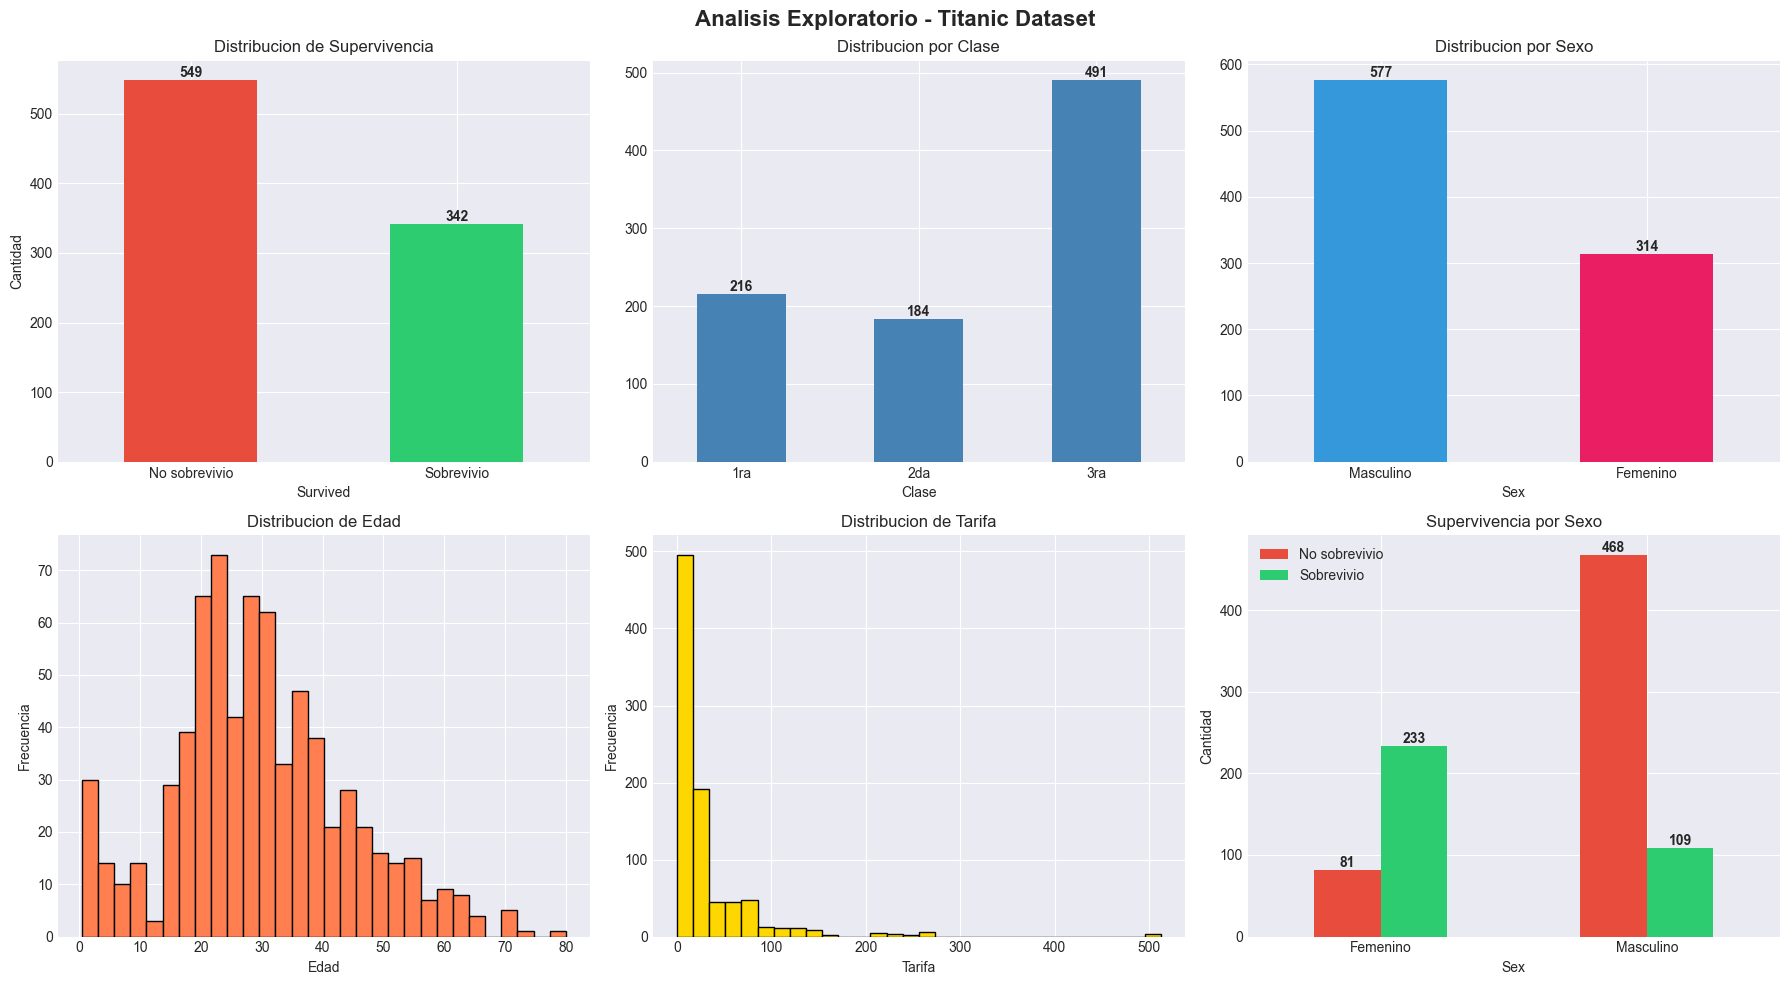

In [3]:
# ============================================================================
# 2. ANALISIS EXPLORATORIO DE DATOS (EDA)
# ============================================================================

print("\n" + "="*80)
print("2. ANALISIS EXPLORATORIO DE DATOS")
print("="*80)

# Valores faltantes
print("\nValores faltantes en train:")
missing_train = df_train.isnull().sum()
print(missing_train[missing_train > 0])

print("\nValores faltantes en test:")
missing_test = df_test.isnull().sum()
print(missing_test[missing_test > 0])

# Estadisticas descriptivas
print("\nEstadisticas descriptivas:")
print(df_train.describe())

# Distribucion de la variable objetivo
print("\nDistribucion de Survived:")
print(df_train['Survived'].value_counts())
print(f"Tasa de supervivencia: {df_train['Survived'].mean()*100:.2f}%")

# Graficos EDA
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Analisis Exploratorio - Titanic Dataset', fontsize=16, fontweight='bold')

# Survived
df_train['Survived'].value_counts().plot(kind='bar', ax=axes[0,0], color=['#e74c3c', '#2ecc71'])
axes[0,0].set_title('Distribucion de Supervivencia')
axes[0,0].set_xticklabels(['No sobrevivio', 'Sobrevivio'], rotation=0)
axes[0,0].set_ylabel('Cantidad')
for container in axes[0,0].containers:
    axes[0,0].bar_label(container, fmt='%d', fontsize=10, fontweight='bold')

# Pclass
df_train['Pclass'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1], color='steelblue')
axes[0,1].set_title('Distribucion por Clase')
axes[0,1].set_xlabel('Clase')
axes[0,1].set_xticklabels(['1ra', '2da', '3ra'], rotation=0)
for container in axes[0,1].containers:
    axes[0,1].bar_label(container, fmt='%d', fontsize=10, fontweight='bold')

# Sex
df_train['Sex'].value_counts().plot(kind='bar', ax=axes[0,2], color=['#3498db', '#e91e63'])
axes[0,2].set_title('Distribucion por Sexo')
axes[0,2].set_xticklabels(['Masculino', 'Femenino'], rotation=0)
for container in axes[0,2].containers:
    axes[0,2].bar_label(container, fmt='%d', fontsize=10, fontweight='bold')

# Age
df_train['Age'].hist(bins=30, ax=axes[1,0], color='coral', edgecolor='black')
axes[1,0].set_title('Distribucion de Edad')
axes[1,0].set_xlabel('Edad')
axes[1,0].set_ylabel('Frecuencia')

# Fare
df_train['Fare'].hist(bins=30, ax=axes[1,1], color='gold', edgecolor='black')
axes[1,1].set_title('Distribucion de Tarifa')
axes[1,1].set_xlabel('Tarifa')
axes[1,1].set_ylabel('Frecuencia')

# Survived by Sex
pd.crosstab(df_train['Sex'], df_train['Survived']).plot(kind='bar', ax=axes[1,2], 
                                                          color=['#e74c3c', '#2ecc71'])
axes[1,2].set_title('Supervivencia por Sexo')
axes[1,2].set_xticklabels(['Femenino', 'Masculino'], rotation=0)
axes[1,2].set_ylabel('Cantidad')
axes[1,2].legend(['No sobrevivio', 'Sobrevivio'])
for container in axes[1,2].containers:
    axes[1,2].bar_label(container, fmt='%d', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('01_eda_titanic.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
# ============================================================================
# 3. PREPROCESAMIENTO DE DATOS
# ============================================================================

print("\n" + "="*80)
print("3. PREPROCESAMIENTO DE DATOS")
print("="*80)

def preprocesar_datos(df, es_train=True):
    """
    Preprocesa el dataset del Titanic aplicando:
    - Imputacion de valores faltantes
    - Feature engineering
    - Codificacion de variables categoricas
    """
    df = df.copy()
    
    # ----- FEATURE ENGINEERING -----
    print("\nFeature Engineering...")
    
    # 1. Extraer Titulo del nombre
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Agrupar titulos raros
    title_mapping = {
        'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
        'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
        'Mlle': 'Miss', 'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare',
        'Jonkheer': 'Rare', 'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Mrs',
        'Capt': 'Rare', 'Sir': 'Rare'
    }
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna('Rare')
    
    # 2. FamilySize = SibSp + Parch + 1
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    # 3. IsAlone
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    
    # 4. Extraer Deck de Cabin
    df['Deck'] = df['Cabin'].str[0]
    df['Deck'] = df['Deck'].fillna('Missing')
    
    # ----- IMPUTACION DE VALORES FALTANTES -----
    print("\nImputando valores faltantes...")
    
    # Age: Mediana por Pclass y Sex
    for pclass in df['Pclass'].unique():
        for sex in df['Sex'].unique():
            mask = (df['Pclass'] == pclass) & (df['Sex'] == sex) & (df['Age'].isnull())
            median_age = df[(df['Pclass'] == pclass) & (df['Sex'] == sex)]['Age'].median()
            df.loc[mask, 'Age'] = median_age
    
    # Embarked: Moda
    if df['Embarked'].isnull().sum() > 0:
        df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    
    # Fare: Mediana (solo en test tiene 1 nulo)
    if df['Fare'].isnull().sum() > 0:
        df['Fare'].fillna(df['Fare'].median(), inplace=True)
    
    # ----- CODIFICACION DE VARIABLES CATEGORICAS -----
    print("\nCodificando variables categoricas...")
    
    # Sex: Label Encoding (male=1, female=0)
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
    
    # Embarked: One-Hot Encoding
    df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)
    
    # Title: One-Hot Encoding
    df = pd.get_dummies(df, columns=['Title'], prefix='Title', drop_first=True)
    
    # Deck: One-Hot Encoding
    df = pd.get_dummies(df, columns=['Deck'], prefix='Deck', drop_first=True)
    
    # ----- ELIMINAR COLUMNAS INNECESARIAS -----
    columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    if not es_train:
        columns_to_drop = [col for col in columns_to_drop if col in df.columns]
    
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    
    print(f"\nShape despues del preprocesamiento: {df.shape}")
    print(f"Columnas finales: {list(df.columns)}")
    
    return df

# Aplicar preprocesamiento
df_train_prep = preprocesar_datos(df_train, es_train=True)
df_test_prep = preprocesar_datos(df_test, es_train=False)

# Alinear columnas entre train y test
missing_cols = set(df_train_prep.columns) - set(df_test_prep.columns) - {'Survived'}
for col in missing_cols:
    df_test_prep[col] = 0

df_test_prep = df_test_prep[df_train_prep.drop('Survived', axis=1).columns]

print("\nPreprocesamiento completado")
print(f"Train shape: {df_train_prep.shape}")
print(f"Test shape: {df_test_prep.shape}")



3. PREPROCESAMIENTO DE DATOS

Feature Engineering...

Imputando valores faltantes...

Codificando variables categoricas...

Shape despues del preprocesamiento: (891, 23)
Columnas finales: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Missing', 'Deck_T']

Feature Engineering...

Imputando valores faltantes...

Codificando variables categoricas...

Shape despues del preprocesamiento: (418, 21)
Columnas finales: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Missing']

Preprocesamiento completado
Train shape: (891, 23)
Test shape: (418, 22)


In [5]:
# ============================================================================
# 4. DIVISION DE DATOS (Train 80% / Test 20%)
# ============================================================================

print("\n" + "="*80)
print("4. DIVISION DE DATOS")
print("="*80)

X = df_train_prep.drop('Survived', axis=1)
y = df_train_prep['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nConjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de validacion: {X_test.shape}")
print(f"\nDistribucion en train: {y_train.value_counts().to_dict()}")
print(f"Distribucion en test: {y_test.value_counts().to_dict()}")


4. DIVISION DE DATOS

Conjunto de entrenamiento: (712, 22)
Conjunto de validacion: (179, 22)

Distribucion en train: {0: 439, 1: 273}
Distribucion en test: {0: 110, 1: 69}


In [6]:
# ============================================================================
# 5. ENTRENAMIENTO DEL ARBOL DE DECISION
# ============================================================================

print("\n" + "="*80)
print("5. ENTRENAMIENTO DEL ARBOL DE DECISION")
print("="*80)

# Hiperparametros definidos
print("\nHiperparametros del modelo:")
print("  - criterion: gini")
print("  - max_depth: 5")
print("  - min_samples_split: 20")
print("  - min_samples_leaf: 10")
print("  - random_state: 42")

# Crear y entrenar el modelo
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_model.fit(X_train, y_train)

print("\nModelo entrenado exitosamente")



5. ENTRENAMIENTO DEL ARBOL DE DECISION

Hiperparametros del modelo:
  - criterion: gini
  - max_depth: 5
  - min_samples_split: 20
  - min_samples_leaf: 10
  - random_state: 42

Modelo entrenado exitosamente


In [7]:
# ============================================================================
# 6. EVALUACION DEL MODELO
# ============================================================================

print("\n" + "="*80)
print("6. EVALUACION DEL MODELO")
print("="*80)

# Predicciones
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Metricas en Train
print("\nMETRICAS EN CONJUNTO DE ENTRENAMIENTO:")
print(f"  Accuracy:  {accuracy_score(y_train, y_train_pred):.4f}")
print(f"  Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"  Recall:    {recall_score(y_train, y_train_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_train, y_train_pred):.4f}")

# Metricas en Test
print("\nMETRICAS EN CONJUNTO DE VALIDACION:")
print(f"  Accuracy:  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"  Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"  Recall:    {recall_score(y_test, y_test_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_test_pred):.4f}")

# Reporte de clasificacion
print("\nREPORTE DE CLASIFICACION (Validacion):")
print(classification_report(y_test, y_test_pred, 
                          target_names=['No sobrevivio', 'Sobrevivio']))



6. EVALUACION DEL MODELO

METRICAS EN CONJUNTO DE ENTRENAMIENTO:
  Accuracy:  0.8525
  Precision: 0.8387
  Recall:    0.7619
  F1-Score:  0.7985

METRICAS EN CONJUNTO DE VALIDACION:
  Accuracy:  0.8268
  Precision: 0.8167
  Recall:    0.7101
  F1-Score:  0.7597

REPORTE DE CLASIFICACION (Validacion):
               precision    recall  f1-score   support

No sobrevivio       0.83      0.90      0.86       110
   Sobrevivio       0.82      0.71      0.76        69

     accuracy                           0.83       179
    macro avg       0.82      0.81      0.81       179
 weighted avg       0.83      0.83      0.82       179




7. GENERANDO VISUALIZACIONES


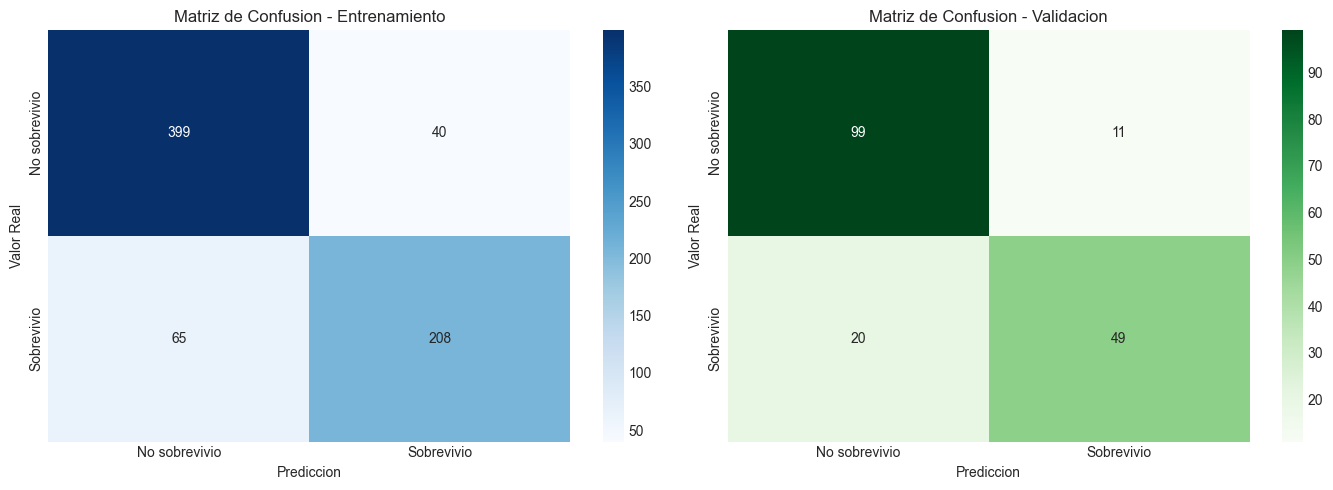


IMPORTANCIA DE CARACTERISTICAS:
         Feature  Importance
11      Title_Mr    0.577716
0         Pclass    0.142624
6     FamilySize    0.082836
13    Title_Rare    0.056400
20  Deck_Missing    0.046198
2            Age    0.042381
5           Fare    0.013841
17        Deck_E    0.013245
9     Embarked_S    0.012712
16        Deck_D    0.012046


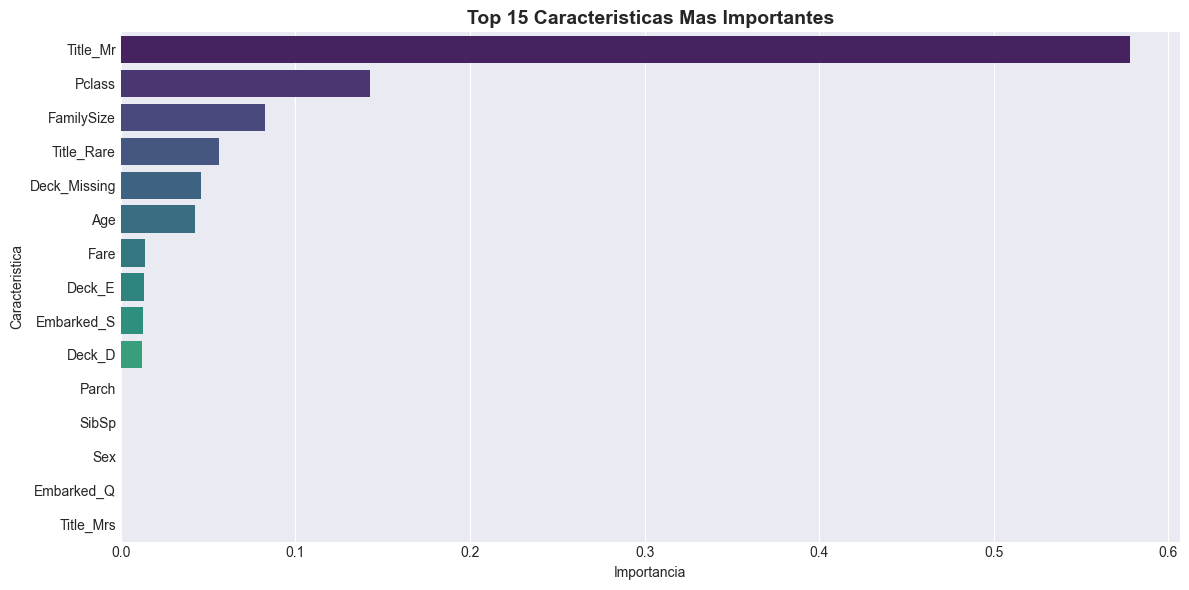

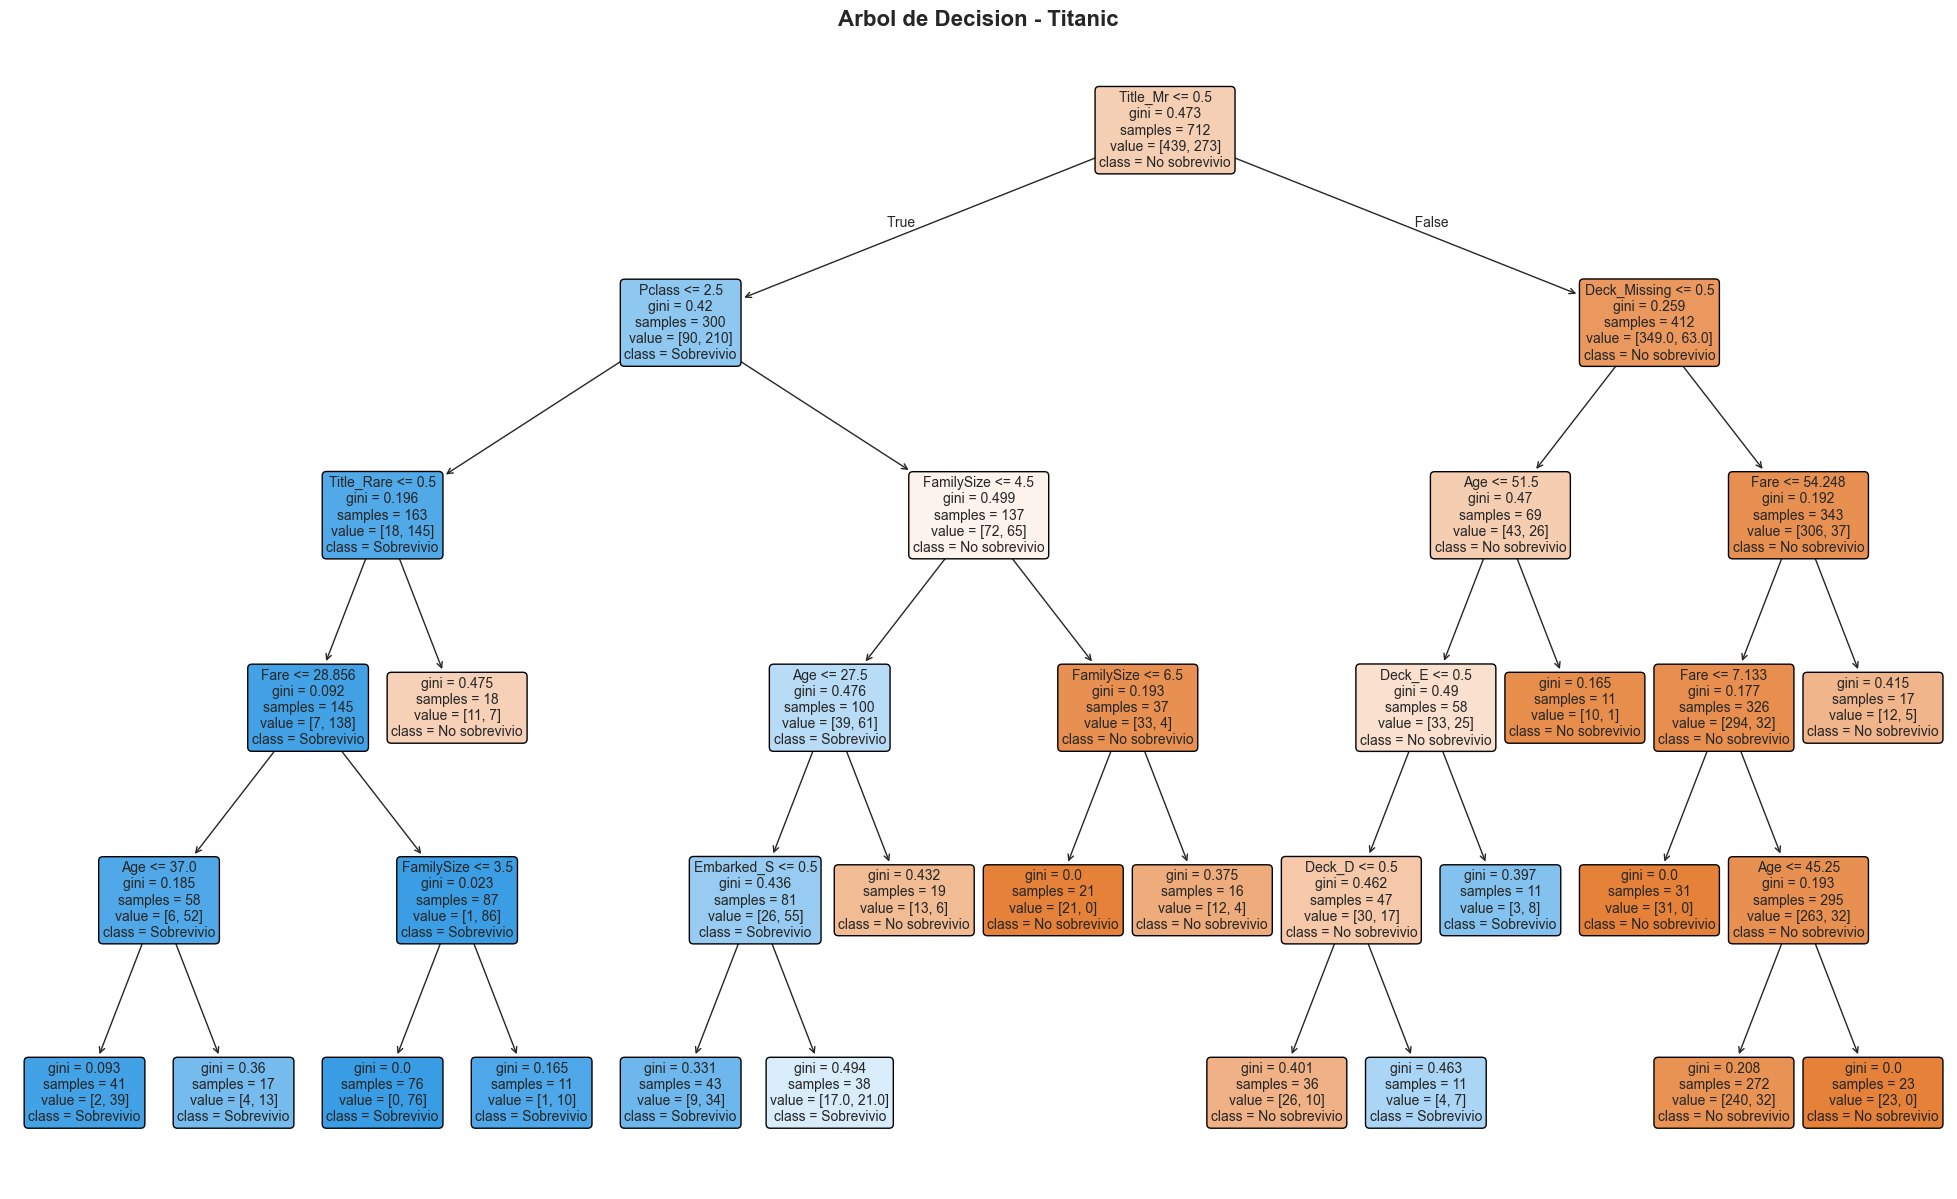


Visualizaciones guardadas exitosamente


In [8]:
# ============================================================================
# 7. VISUALIZACIONES
# ============================================================================

print("\n" + "="*80)
print("7. GENERANDO VISUALIZACIONES")
print("="*80)

# --- MATRIZ DE CONFUSION ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No sobrevivio', 'Sobrevivio'],
            yticklabels=['No sobrevivio', 'Sobrevivio'])
axes[0].set_title('Matriz de Confusion - Entrenamiento')
axes[0].set_ylabel('Valor Real')
axes[0].set_xlabel('Prediccion')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No sobrevivio', 'Sobrevivio'],
            yticklabels=['No sobrevivio', 'Sobrevivio'])
axes[1].set_title('Matriz de Confusion - Validacion')
axes[1].set_ylabel('Valor Real')
axes[1].set_xlabel('Prediccion')

plt.tight_layout()
plt.savefig('02_matriz_confusion.png', dpi=300, bbox_inches='tight')
plt.show()

# --- IMPORTANCIA DE CARACTERISTICAS ---
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nIMPORTANCIA DE CARACTERISTICAS:")
print(feature_importance.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Caracteristicas Mas Importantes', fontsize=14, fontweight='bold')
plt.xlabel('Importancia')
plt.ylabel('Caracteristica')
plt.tight_layout()
plt.savefig('03_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# --- VISUALIZACION DEL ARBOL ---
plt.figure(figsize=(25, 15))
plot_tree(dt_model, 
          feature_names=X_train.columns,
          class_names=['No sobrevivio', 'Sobrevivio'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Arbol de Decision - Titanic', fontsize=16, fontweight='bold')
plt.savefig('04_arbol_decision.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualizaciones guardadas exitosamente")


In [9]:
# ============================================================================
# 8. PREDICCION EN CONJUNTO DE PRUEBA DE KAGGLE
# ============================================================================

print("\n" + "="*80)
print("8. GENERANDO PREDICCIONES PARA KAGGLE")
print("="*80)

# Predicciones en test original
predicciones_kaggle = dt_model.predict(df_test_prep)

# Crear archivo de submission
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predicciones_kaggle
})

submission.to_csv('submission_arbol_decision.csv', index=False)

print("\nArchivo 'submission_arbol_decision.csv' generado")
print(f"Total de predicciones: {len(predicciones_kaggle)}")
print(f"Sobrevivientes predichos: {predicciones_kaggle.sum()} ({predicciones_kaggle.mean()*100:.2f}%)")

print("\n" + "="*80)
print("PROCESO COMPLETADO EXITOSAMENTE")
print("="*80)


8. GENERANDO PREDICCIONES PARA KAGGLE

Archivo 'submission_arbol_decision.csv' generado
Total de predicciones: 418
Sobrevivientes predichos: 159 (38.04%)

PROCESO COMPLETADO EXITOSAMENTE
